In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib.patches import Circle
from scipy.interpolate import interp1d
from scipy.interpolate import UnivariateSpline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
from scipy.misc import derivative
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [3]:
# use your path to Theory file
Psi_r_the = np.loadtxt("/home/arturo/Documents/LAM/LAM2LUPM/potentials/halo_B/Psi_halo_B_DM_baryons_Rmax=881.61kpc_dimensionful.txt")

In [24]:
# path to sim File
data = np.loadtxt("/home/arturo/Documents/LAM/LAM2LUPM/HALOB/Psi_hydro_HALOB.txt")
r_averaged,Psi_averaged = data[:,0], data[:,1]

In [5]:
# Get a function to interpolate date
ff = interp1d(np.log10(r_averaged),np.log10(Psi_averaged))
def f(r):return 10**ff(r)




In [6]:
spl = UnivariateSpline(r_averaged, Psi_averaged)

In [7]:
print spl(1), spl(0.1)

196944.0989152654 196499.70761822164


In [8]:
r_sampled = np.logspace(-2.5,3,1000)
dfdx = derivative(spl,r_sampled)
dfdx2 = derivative(spl,r_sampled,3e-1*r_sampled)


5.400973268816819e-10

In [55]:
# second method
## theory
r_bis = np.append(Psi_r_the[:,0],1.1*max(Psi_r_the[:,0]))
Psi_bis = np.append(Psi_r_the[:,1],Psi_r_the[-1,1]/10000.)

def Psi_interp(r_new):
    return 10**interp1d(np.log10(r_bis),np.log10(Psi_bis))(np.log10(r_new))

def Psi_prime_num(R):
    return derivative(Psi_interp,R,dx=3e-2*R)


r_bis_S = np.append(r_averaged,1.1*max(r_averaged))
Psi_bis_S= np.append(Psi_averaged,Psi_averaged[-1]/10000.)

def Psi_interp_S(r_new):
    return 10**interp1d(np.log10(r_bis_S),np.log10(Psi_bis_S))(np.log10(r_new))

def Psi_prime_num_S(R):
    return derivative(Psi_interp_S,R,dx=3e-2*R)



<IPython.core.display.Javascript object>


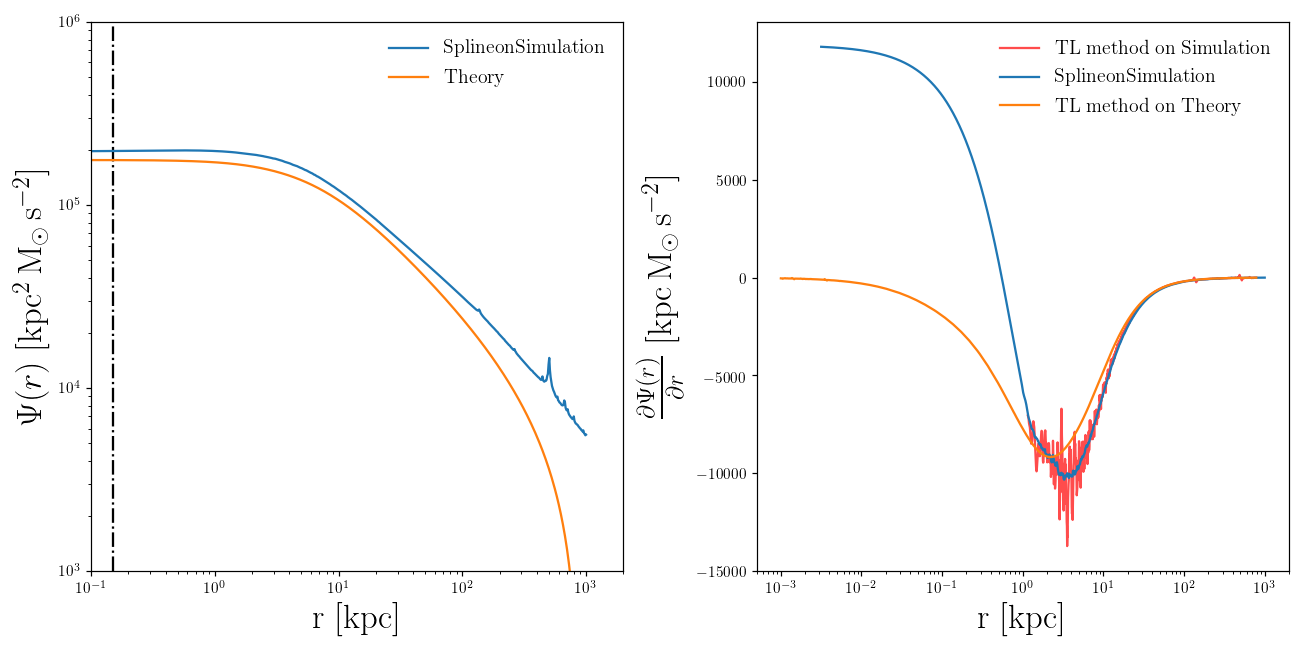

In [72]:
fig, [ax,ax1]= plt.subplots(1,2,figsize=[12,6])
ax.set_xscale('log')
ax.set_yscale('log')
ax1.set_xscale('log')
ax.set_xlabel(r'$\mathrm{r \;[kpc]}$', fontsize=23)
ax.set_ylabel(r'$\Psi(r)\mathrm{\;[kpc^2 \,M_{\odot}\, s^{-2}]}$', fontsize=23)
ax.set_xlim([0.1,2000])
ax.set_ylim([1e3,1e6])
beg = 610
endo = 980

#ax.plot(r_averaged, Psi_averaged,label=r"$\rm Simulation$")
ax.axvline(x=0.150,c='k',ls='-.')
ax.plot(r_sampled, spl(r_sampled),label=r"$\rm Spline on Simulation$")

ax.plot(Psi_r_the[:,0],Psi_r_the[:,1],label=r"$\rm Theory$")

leg = ax.legend(loc='upper right', ncol=1, shadow=False, fontsize=13)
leg.get_frame().set_linewidth(0.0)


## second panel
ax1.plot(r_plot, Psi_prime_num_S(r_plot),c='r',alpha=0.7, label=r"$\rm TL\;method\;on\;Simulation$" )


ax1.plot(r_sampled,dfdx2,label=r"$\rm Spline on Simulation$")
r_plot = 10**np.linspace(np.log10(1e-3),np.log10(0.999*R_max*r_s),1000) #kpc    #don't go exactly to R_max, otherwise the interpolation may fail at the edge due to round-up numbers; it's not a problem

ax1.plot(r_plot, Psi_prime_num(r_plot),label=r"$\rm TL\;method\;on\;Theory$" )
r_plot = 10**np.linspace(np.log10(r_averaged[1]),np.log10(0.999*R_max*r_s),1000) #kpc    #don't go exactly to R_max, otherwise the interpolation may fail at the edge due to round-up numbers; it's not a problem




ax1.set_xlabel('$\mathrm{r \;[kpc]}$', fontsize=23)
ax1.set_ylabel(r'$\frac{\partial\Psi(r)}{\partial r}\mathrm{\;[kpc \,M_{\odot}\, s^{-2}]}$', fontsize=23)
plt.tight_layout()
leg = ax1.legend(loc='upper right', ncol=1, shadow=False, fontsize=13)
leg.get_frame().set_linewidth(0.0)

# Second try

<IPython.core.display.Javascript object>


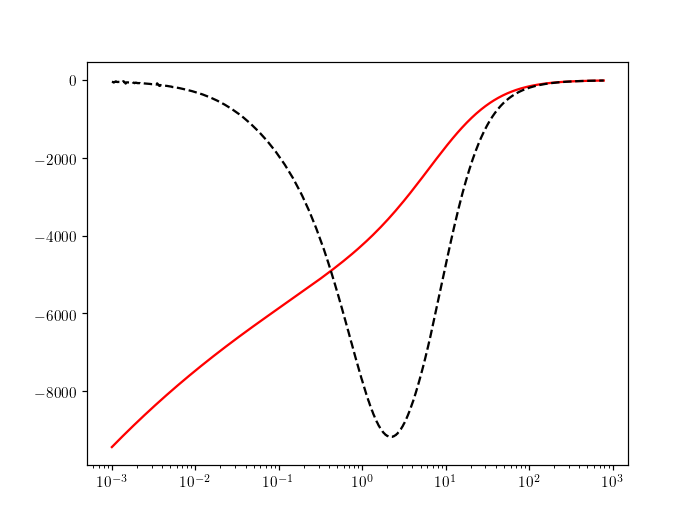

[]

In [18]:
#Script for derivative of Psi(r) for haloB, DMO (example)
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.misc import derivative


G = 6.67384e-11

#haloB, DMO as an example
alpha0 = 1.
beta0 = 2.785
gamma0 = 1.101

rho_s = 10**7.101  #M_Sun/kpc^3
r_s = 10.338   #kpc
R_max = 785.94    #kpc
R_max *= 1./r_s

def rho(x):
    return x**(-gamma0)*(1.+x**alpha0)**(-(beta0-gamma0)/alpha0)


#getting the files
path = '/home/arturo/Documents/LAM/LAM2LUPM/potentials/halo_B/Psi_halo_B_DM_baryons_Rmax=881.61kpc_dimensionful.txt'

r,Psi = np.loadtxt(path,unpack=True)

#Extending the interval to be able to perform derivative at the edges
r_bis = np.append(r,1.1*max(r))
Psi_bis = np.append(Psi,Psi[-1]/10000.)



#Interpolating the Psi function
def Psi_interp(r_new):
    return 10**interp1d(np.log10(r_bis),np.log10(Psi_bis))(np.log10(r_new))

#Mass m(r)
r_sample = 10**np.linspace(np.log10(1.e-10),np.log10(R_max),400)
r_prime = np.array([10**np.linspace(np.log10(9e-11),np.log10(r_sample[i]),500) for i in xrange(len(r_sample))])
integrand = r_prime**2*rho(r_prime)
m_sample = simps(integrand,r_prime,axis=-1)
def m(r):
    #r is dimensionless here
    return 10**interp1d(np.log10(r_sample),np.log10(m_sample))(np.log10(r))




#'Analytical derivative' from m(r)
def Psi_prime(r):
    return -m(r/r_s)/(r/r_s)**2

#Numerical derivative
def Psi_prime_num(r):
    return derivative(Psi_interp,r,dx=3e-2*r)



#r for plots
r_plot = 10**np.linspace(np.log10(1e-3),np.log10(0.999*R_max*r_s),1000) #kpc    #don't go exactly to R_max, otherwise the interpolation may fail at the edge due to round-up numbers; it's not a problem
fig, ax = plt.subplots()
normalization = 4.*np.pi*G*(3.08568e19)**(-1)*1e-6*1.98842e30*rho_s*r_s**2 #to get the right normalization since m(r) was defined as dimensionless
ax.plot(r_plot,Psi_prime(r_plot)*normalization/r_s,'r')  #derivative of Psi from m(r), dimensionful
ax.plot(r_plot,Psi_prime_num(r_plot),'k--')  #numerical derivative of Psi, dimensionful
plt.semilogx()

#plt.show()